In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import mapclassify
plt.style.use('seaborn')
plt.style.use('matplotlibrc.py')

In [2]:
natalidad = "provincias_argentinas_polygon.geojson"
map_data = gpd.read_file(natalidad)
casos_cmilhab = np.array([6329,1006,2366,6177,1379,2632,109,2446,4183,2365,3126,172,7256,5869,1620,1675,3319,8033,5515,2003,4384,3662,4283,11970])
#casos_cmilhab = np.array([172,3319,1675,2632,8033,5869,6177,3662,3126,2356,1006,4183,2003,1379,5515,4384,7256,1620,2366,109,2446,6329,4283,11970])
map_data['casos_cmil'] =  casos_cmilhab
scheme = mapclassify.Quantiles(casos_cmilhab, k=5)

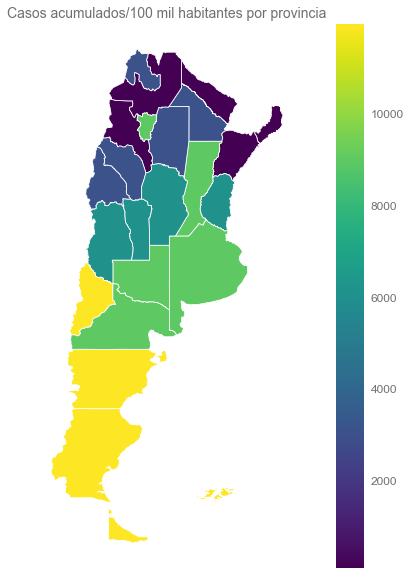

In [28]:
#ax.set_yticklabels([])
#ax.set_xticklabels([])
#divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="5%", pad=0.0)
ax = map_data.plot(column='casos_cmil', cmap='viridis',scheme='quantiles',
              legend=False,figsize=(15, 10),edgecolor='white',linewidth=0.8)
#ax.grid(False)
#ax.set_facecolor((1.0, 1.0, 1.0))
norm = Normalize(vmin=map_data['casos_cmil'].min(), vmax=map_data['casos_cmil'].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap='viridis')
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)
ax.set_axis_off()
plt.title('Casos acumulados/100 mil habitantes por provincia',fontsize=14)
plt.savefig('mapa.pdf')
plt.show()